# Global Power Plant Database project

Project Description :  
The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.


Key attributes of the database :  
•	`country` (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification   
•	`country_long` (text): longer form of the country designation   
•	`name` (text): name or title of the power plant, generally in Romanized form   
•	`gppd_idnr` (text): 10 or 12 character identifier for the power plant   
•	`capacity_mw` (number): electrical generating capacity in megawatts   
•	`latitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)   
•	`longitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)   
•	`primary_fuel` (text): energy source used in primary electricity generation or export   
•	`other_fuel1` (text): energy source used in electricity generation or export  
•	`other_fuel2` (text): energy source used in electricity generation or export  
•	`other_fuel3` (text): energy source used in electricity generation or export   
•	 `commissioning_year` (number): year of plant operation, weighted by unit-capacity when data is available  
•	`owner` (text): majority shareholder of the power plant, generally in Romanized form   
•	`source` (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form  
•	`url` (text): web document corresponding to the `source` field   
•	`geolocation_source` (text): attribution for geolocation information    
•	`wepp_id` (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.   
•	`year_of_capacity_data` (number): year the capacity information was reported    
•	`generation_gwh_2013` (number): electricity generation in gigawatt-hours reported for the year 2013   
•	`generation_gwh_2014` (number): electricity generation in gigawatt-hours reported for the year 2014   
•	`generation_gwh_2015` (number): electricity generation in gigawatt-hours reported for the year 2015  
•	`generation_gwh_2016` (number): electricity generation in gigawatt-hours reported for the year 2016   
•	`generation_gwh_2017` (number): electricity generation in gigawatt-hours reported for the year 2017  
•	`generation_gwh_2018` (number): electricity generation in gigawatt-hours reported for the year 2018  
•	`generation_gwh_2019` (number): electricity generation in gigawatt-hours reported for the year 2019  
•	`generation_data_source` (text): attribution for the reported generation information   
•	`estimated_generation_gwh_2013` (number): estimated electricity generation in gigawatt-hours for the year 2013   
•	`estimated_generation_gwh_2014` (number): estimated electricity generation in gigawatt-hours for the year 2014   
•	`estimated_generation_gwh_2015` (number): estimated electricity generation in gigawatt-hours for the year 2015    
•	`estimated_generation_gwh_2016` (number): estimated electricity generation in gigawatt-hours for the year 2016   
•	`estimated_generation_gwh_2017` (number): estimated electricity generation in gigawatt-hours for the year 2017  
•	'estimated_generation_note_2013` (text): label of the model/method used to estimate generation for the year 2013  
•	`estimated_generation_note_2014` (text): label of the model/method used to estimate generation for the year 2014   
•	`estimated_generation_note_2015` (text): label of the model/method used to estimate generation for the year 2015  
•	`estimated_generation_note_2016` (text): label of the model/method used to estimate generation for the year 2016   
•	`estimated_generation_note_2017` (text): label of the model/method used to estimate generation for the year 2017   
Fuel Type Aggregation      
We define the "Fuel Type" attribute of our database based on common fuel categories.      
Prediction :   Make two prediction  1) Primary Fuel    2) capacity_mw 


#### Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

#### Loading the Dataset and showing first 5 rows

In [2]:
df_pp = pd.read_csv("C:\\Users\\rashm\\Downloads\\database_IND.csv")
df_pp.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


## Exploratory Data Analysis(EDA)

In [3]:
#checking the dimension of the dataset
df_pp.shape

(907, 27)

This dataset contains 907 rows and 27 columns

In [4]:
#getting the information from the dataset
df_pp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

We can see there are 2 different types of data (folat and object) present in the dataset.  
Some columns(other_fuel3,wepp_id,generation_gwh_2013,generation_gwh_2019,estimated_generation_gwh) are empty columns.

In [5]:
# checking for the missing values
df_pp.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

There are so many missing values present in the dataset.

In [6]:
# Checking the Unique Values of Each Column
df_pp.apply(pd.Series.unique)

country                                                                 [IND]
country_long                                                          [India]
name                        [ACME Solar Tower, ADITYA CEMENT WORKS, AES Sa...
gppd_idnr                   [WRI1020239, WRI1019881, WRI1026669, IND000000...
capacity_mw                 [2.5, 98.0, 39.2, 135.0, 1800.0, 250.0, 60.0, ...
latitude                    [28.1839, 24.7663, 21.9038, 23.8712, 21.9603, ...
longitude                   [73.2407, 74.609, 69.3732, 91.3602, 82.4091, 6...
primary_fuel                [Solar, Coal, Wind, Gas, Hydro, Biomass, Oil, ...
other_fuel1                                     [nan, Oil, Cogeneration, Gas]
other_fuel2                                                        [nan, Oil]
other_fuel3                                                             [nan]
commissioning_year          [2011.0, nan, 2004.0, 2015.0, 2005.0, 1970.0, ...
owner                       [Solar Paces, Ultratech Cement ltd, 

### Data Cleaning

#### Observations :    
- country and country_long columns are of same type only indicating country name.
- other_fuel3,wepp_id,generation_gwh_2013,generation_gwh_2019,estimated_generation_gwh columns are empty.  
- other_fuel2 is having all nan values except only one.
- other_fuel1 is having most of the null values i.e 709 null values.
- commissioning_year having so much missing data and non relevant to our targets.
- owner - More than 60 % data missing
- year_of_capacity_data - So much missing data with single unique value.
- gppd_idnr has unique names which are not relevant to our target.
- name - it only indicates the names of powerplants and not impact to our predictions.
- url is not relevant as it contains only one value.
- As we have already geolocation_source and it quite similaar to source.so dropping source.  
- generation_data_source has almost 50% missing values and only one unique values.    
So we need to remove all the above columns.

In [7]:
#Dropping out the unrequired columns
df_pp.drop(['country','country_long','name','gppd_idnr','other_fuel1','other_fuel2','other_fuel3','commissioning_year','owner','source','url','wepp_id','year_of_capacity_data','generation_gwh_2013','generation_gwh_2019','estimated_generation_gwh','generation_data_source'], axis=1, inplace=True)

In [8]:
df_pp.shape

(907, 10)

In [9]:
df_pp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   capacity_mw          907 non-null    float64
 1   latitude             861 non-null    float64
 2   longitude            861 non-null    float64
 3   primary_fuel         907 non-null    object 
 4   geolocation_source   888 non-null    object 
 5   generation_gwh_2014  398 non-null    float64
 6   generation_gwh_2015  422 non-null    float64
 7   generation_gwh_2016  434 non-null    float64
 8   generation_gwh_2017  440 non-null    float64
 9   generation_gwh_2018  448 non-null    float64
dtypes: float64(8), object(2)
memory usage: 71.0+ KB


### Filling null values

In [10]:
# filling null values with median in numerical columns
df_pp['generation_gwh_2014'].fillna(value=df_pp['generation_gwh_2014'].median(), inplace= True)
df_pp['generation_gwh_2015'].fillna(value=df_pp['generation_gwh_2015'].median(), inplace= True)
df_pp['generation_gwh_2016'].fillna(value=df_pp['generation_gwh_2016'].median(), inplace= True)
df_pp['generation_gwh_2017'].fillna(value=df_pp['generation_gwh_2017'].median(), inplace= True)
df_pp['generation_gwh_2018'].fillna(value=df_pp['generation_gwh_2018'].median(), inplace= True)

# filling missing data for latitude and longitude with mean
df_pp['latitude'].fillna(value=df_pp['latitude'].mean(), inplace= True)
df_pp['longitude'].fillna(value=df_pp['longitude'].mean(), inplace= True) 

# filling geolocation_source with mode because category data
df_pp['geolocation_source'].fillna(df_pp['geolocation_source'].mode()[0], inplace=True)

In [11]:
df_pp.isnull().sum()

capacity_mw            0
latitude               0
longitude              0
primary_fuel           0
geolocation_source     0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
generation_gwh_2018    0
dtype: int64

Now we can see that all null values has been removed.

## Statistical analysis

In [12]:
#summary of the numerical dataset
df_pp.describe()

,capacity_mw,latitude,longitude,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
count,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000
mean,326.223755,21.197918,77.464907,1516.689956,1510.071296,1565.361383,1657.121797,1665.011030
std,590.085456,6.079148,4.812291,2785.604307,2984.994556,3005.087210,3046.862910,3168.826750
min,0.000000,8.168900,68.644700,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.725000,17.072000,74.388900,801.123775,711.181225,737.205450,817.977250,751.644375
50%,59.200000,21.281800,76.979200,801.123775,711.181225,737.205450,817.977250,751.644375
75%,385.250000,25.176450,79.206100,801.123775,711.181225,737.205450,817.977250,751.644375
max,4760.000000,34.649000,95.408000,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000


Observation:  
- The counts of all the columns are same i.e,907 which means there are no missing values present in it.   
- Bigest Powerplant has power generation capacity of 4760 MW.   
- Powerplants are located in latitude range of 8.1689 to 34.6490 while longitudal range is 68.64 to 95.4080.     
- Median of capacity MW is 60 MW. This suggest that there are lot of small capacity powerplant in dataset.  
- we observe that there is a huge difference between the 75% and max of some columns,so there may be outliers present in it.  
We will investigate regarding outliers later.

#### Seggregating numerical and categorical columns

In [13]:
#Checking for categorical columns
cat_col=[]
for i in df_pp.dtypes.index:
    if df_pp.dtypes[i]=="object":
        cat_col.append(i)
print("Categorical Columns:", cat_col)

Categorical Columns: ['primary_fuel', 'geolocation_source']


In [14]:
#Checking for numerical columns
num_col=[]
for i in df_pp.dtypes.index:
    if df_pp.dtypes[i]!="object":
        num_col.append(i)
print("Numerical Columns:\n", num_col)

Numerical Columns:
 ['capacity_mw', 'latitude', 'longitude', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018']


#### We have two different Target feature for regression and classification model.(1) Primary Fuel 2) capacity_mw)  
#### Exploring both the targets one by one
#### 1) Regression Target - Capacity_mw

## Data Visualization

### Data Analysis by Visualization of Categorical columns

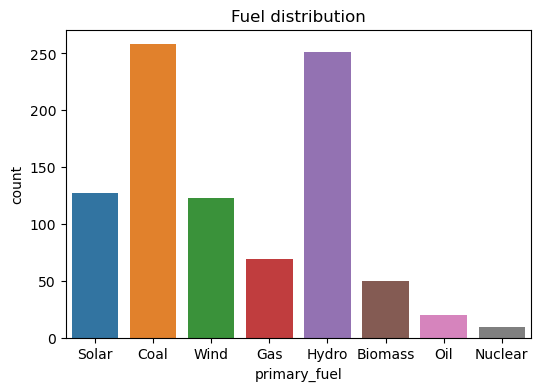

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64


In [15]:
#Visualizing the primary_fuel Distribution
plt.figure(figsize=(6,4))
ax=sns.countplot(x='primary_fuel',data=df_pp)
plt.title('Fuel distribution')
plt.show()
print(df_pp['primary_fuel'].value_counts())

From the above counplot we can observe,  
Maximum Number of powerplants are coal based powerplants followed by Hydro based powerplants and nuclear based has least number of powerplants.  
Considering as target, this dataset is imbalance,we will balance it later

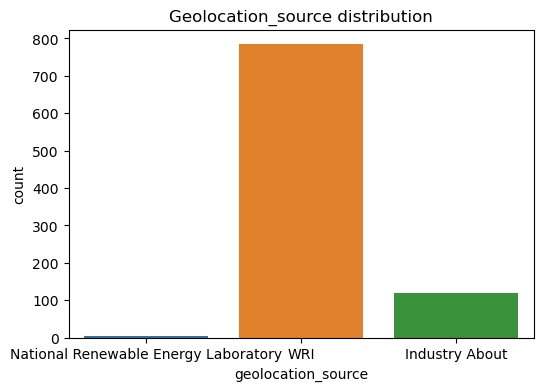

WRI                                     784
Industry About                          119
National Renewable Energy Laboratory      4
Name: geolocation_source, dtype: int64


In [16]:
#Visualizing the primary_fuel Distribution
plt.figure(figsize=(6,4))
ax=sns.countplot(x='geolocation_source',data=df_pp)
plt.title('Geolocation_source distribution')
plt.show()
print(df_pp['geolocation_source'].value_counts())

From above we can see,  
Maximum powerplants are sourced from WRI follwed by industry About and National Renewable Energy has least powerplants.

### Data Distribution Analysis by Visualization of Numerical columns

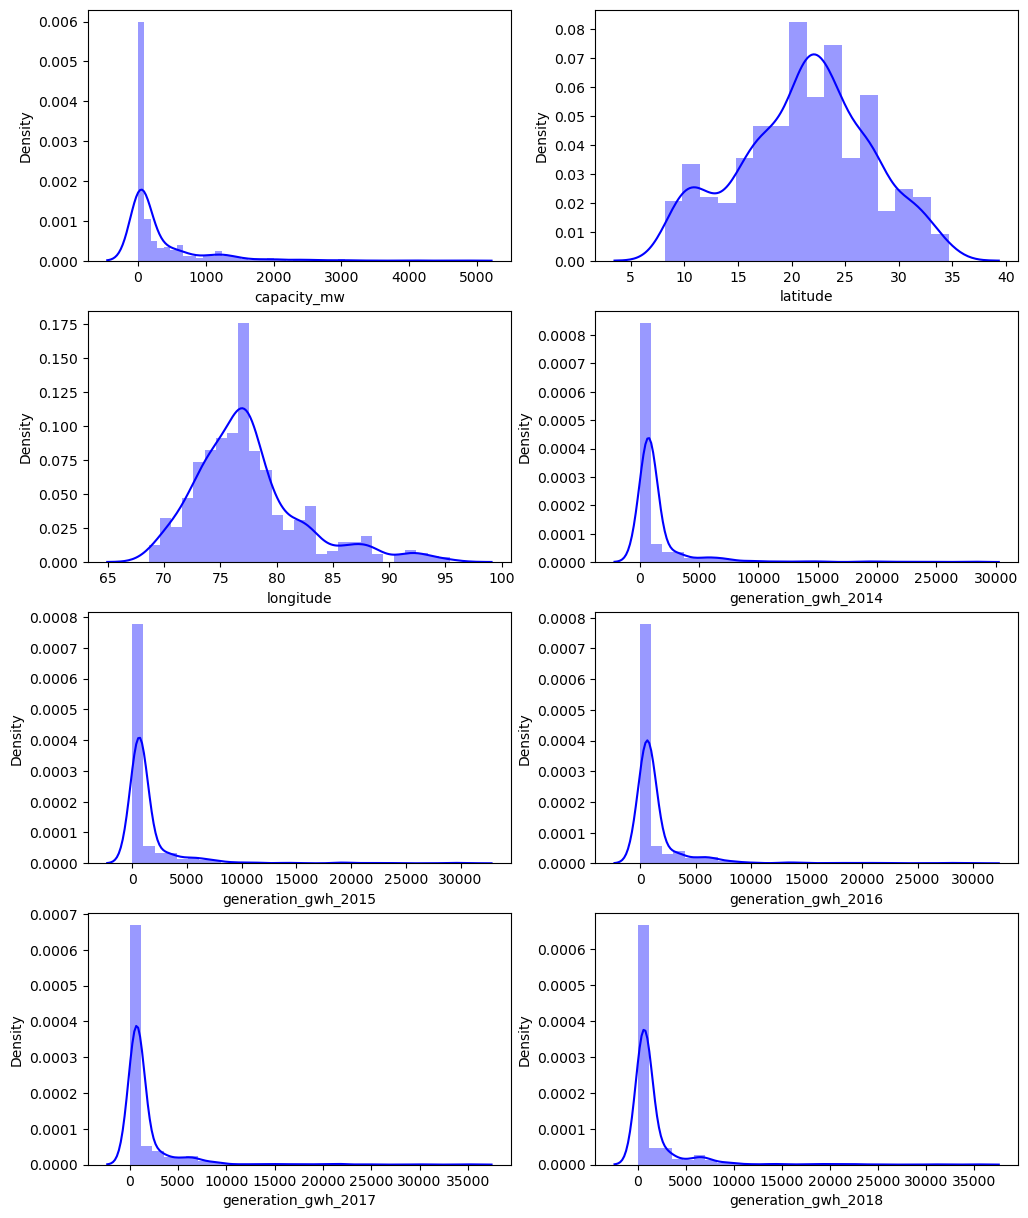

In [20]:
plt.figure(figsize=(12,15),facecolor='white')
plotnumber=1
for column in num_col:
    if plotnumber <= 8:
        ax=plt.subplot(4,2,plotnumber)
        sns.distplot(df_pp[column],color='b')
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()

From the above distribution plot we can observe that the data is not normally distributed in all the columns except latitude and longitude which suggest presence of outliers.

### Visualizing the outliers using boxplot

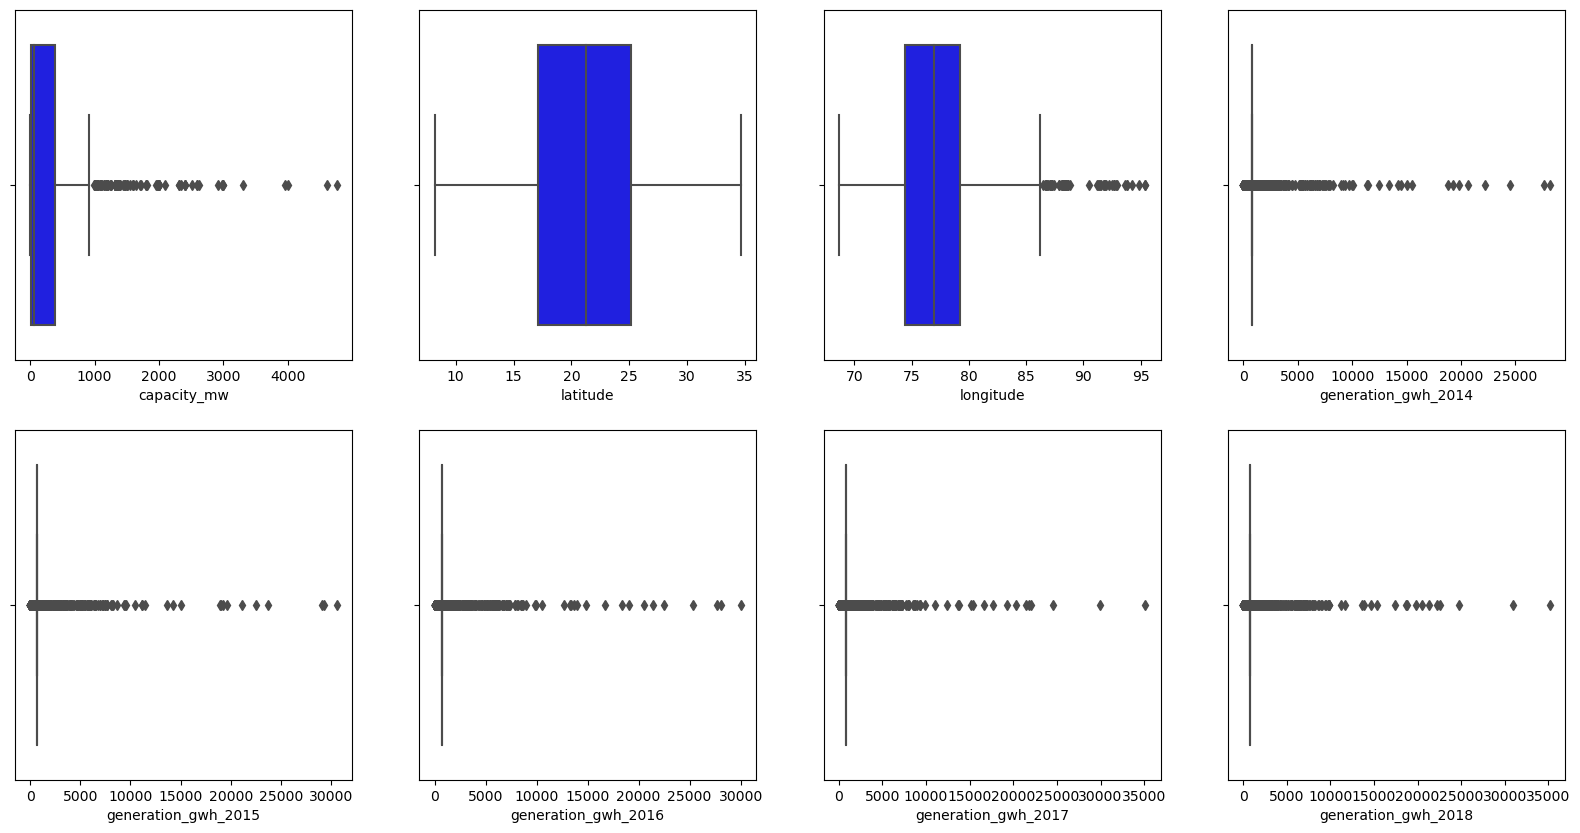

In [21]:
plt.figure(figsize=(20,10),facecolor='white')
graph=1
for column in num_col:
    if graph <= 8:
        ax=plt.subplot(2,4,graph)
        sns.boxplot(df_pp[column],color='b')
        plt.xlabel(column,fontsize=10)
    graph+=1
plt.show()

In the boxplot we can notice the outliers present in all the columns except latitude.  
we will not investigate capacity_mw column as this is our target/ label.  
Let's remove outliers from other columns using Zscore method.

### Removing outliers using z-score method

In [22]:
from scipy.stats import zscore
z=zscore(df_pp[['longitude', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018']])
abs_z=np.abs(z)
df_pp=df_pp[(abs_z<3).all(axis=1)]  #3-std deviation data
df_pp.shape

(871, 10)

Before the size was (907, 10).

### Encoding the categorical columns

In [23]:
# Using Label Encoder on categorical columns
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_pp['primary_fuel']=le.fit_transform(df_pp['primary_fuel'])
df_pp['geolocation_source']=le.fit_transform(df_pp['geolocation_source'])
df_pp.head()

,capacity_mw,latitude,longitude,primary_fuel,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,6,1,801.123775,711.181225,737.205450,817.977250,751.644375
1,98.0,24.7663,74.6090,1,2,801.123775,711.181225,737.205450,817.977250,751.644375
2,39.2,21.9038,69.3732,7,2,801.123775,711.181225,737.205450,817.977250,751.644375
3,135.0,23.8712,91.3602,2,2,617.789264,843.747000,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,1,2,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000


### Correlation matrix using HeatMap

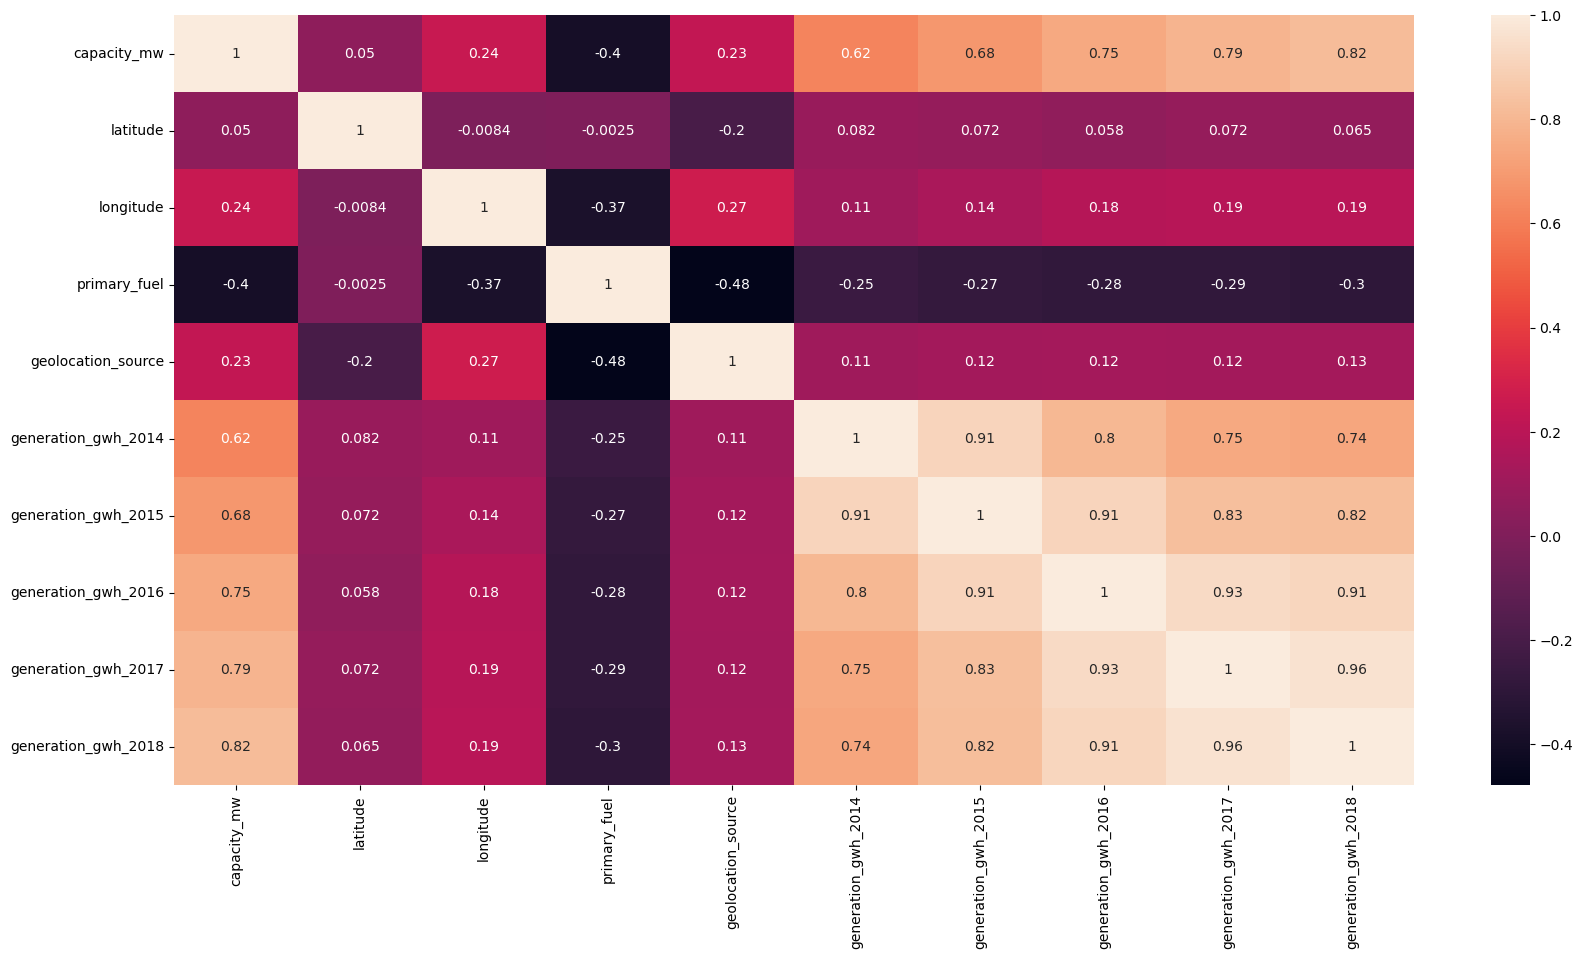

In [24]:
plt.figure(figsize=(20,10))
sns.heatmap(df_pp.corr(), annot = True)
plt.show()

From the correlation matrix, we can see the co-relation between all the features and the features and targets.  
- The label capacity_mw is positively correlated with all the features except one feature i.e, primary fuel which is negatively correlated to the label.
- latitude has very very less correlation with the label.
From the heat map we can notice most of the features are highly correlated with each other which leads to multicollinearity problem. So will try to solve this problem by Checking VIF value before building our models.


### Visualizing the correlation between label and features using plot

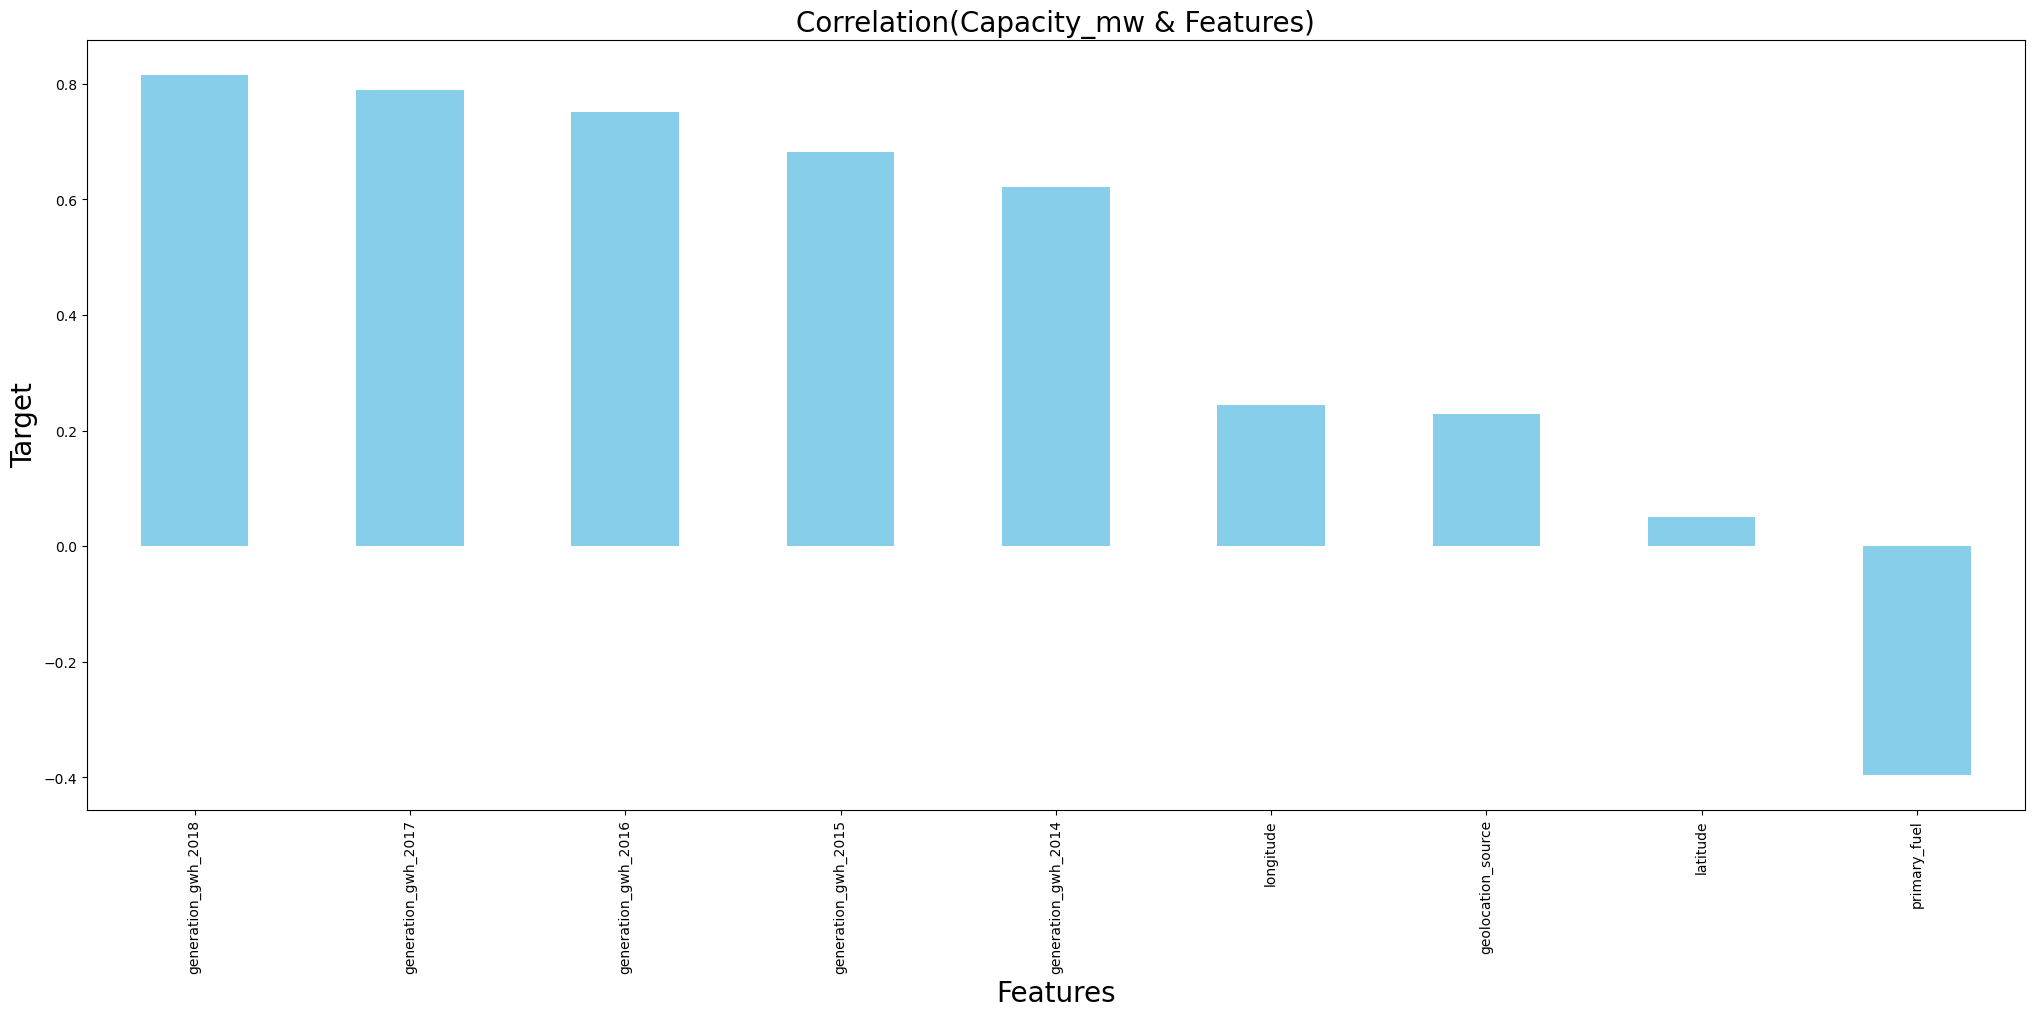

In [25]:
# visualization of target "capacity_mw" with other features in plots
plt.figure(figsize =(25, 10))
df_pp.corr()['capacity_mw'].sort_values(ascending = False).drop(['capacity_mw']).plot(kind ='bar', color ='skyblue')
plt.xlabel('Features',fontsize=20)
plt.ylabel('Target',fontsize=20)
plt.title('Correlation(Capacity_mw & Features)',fontsize=20)
plt.show()

### Separating the features and target

In [26]:
x = df_pp.drop(['capacity_mw'],axis=1)  #Features
y = df_pp['capacity_mw']   #Target

### Visualizing the relationship of features with the label/target.

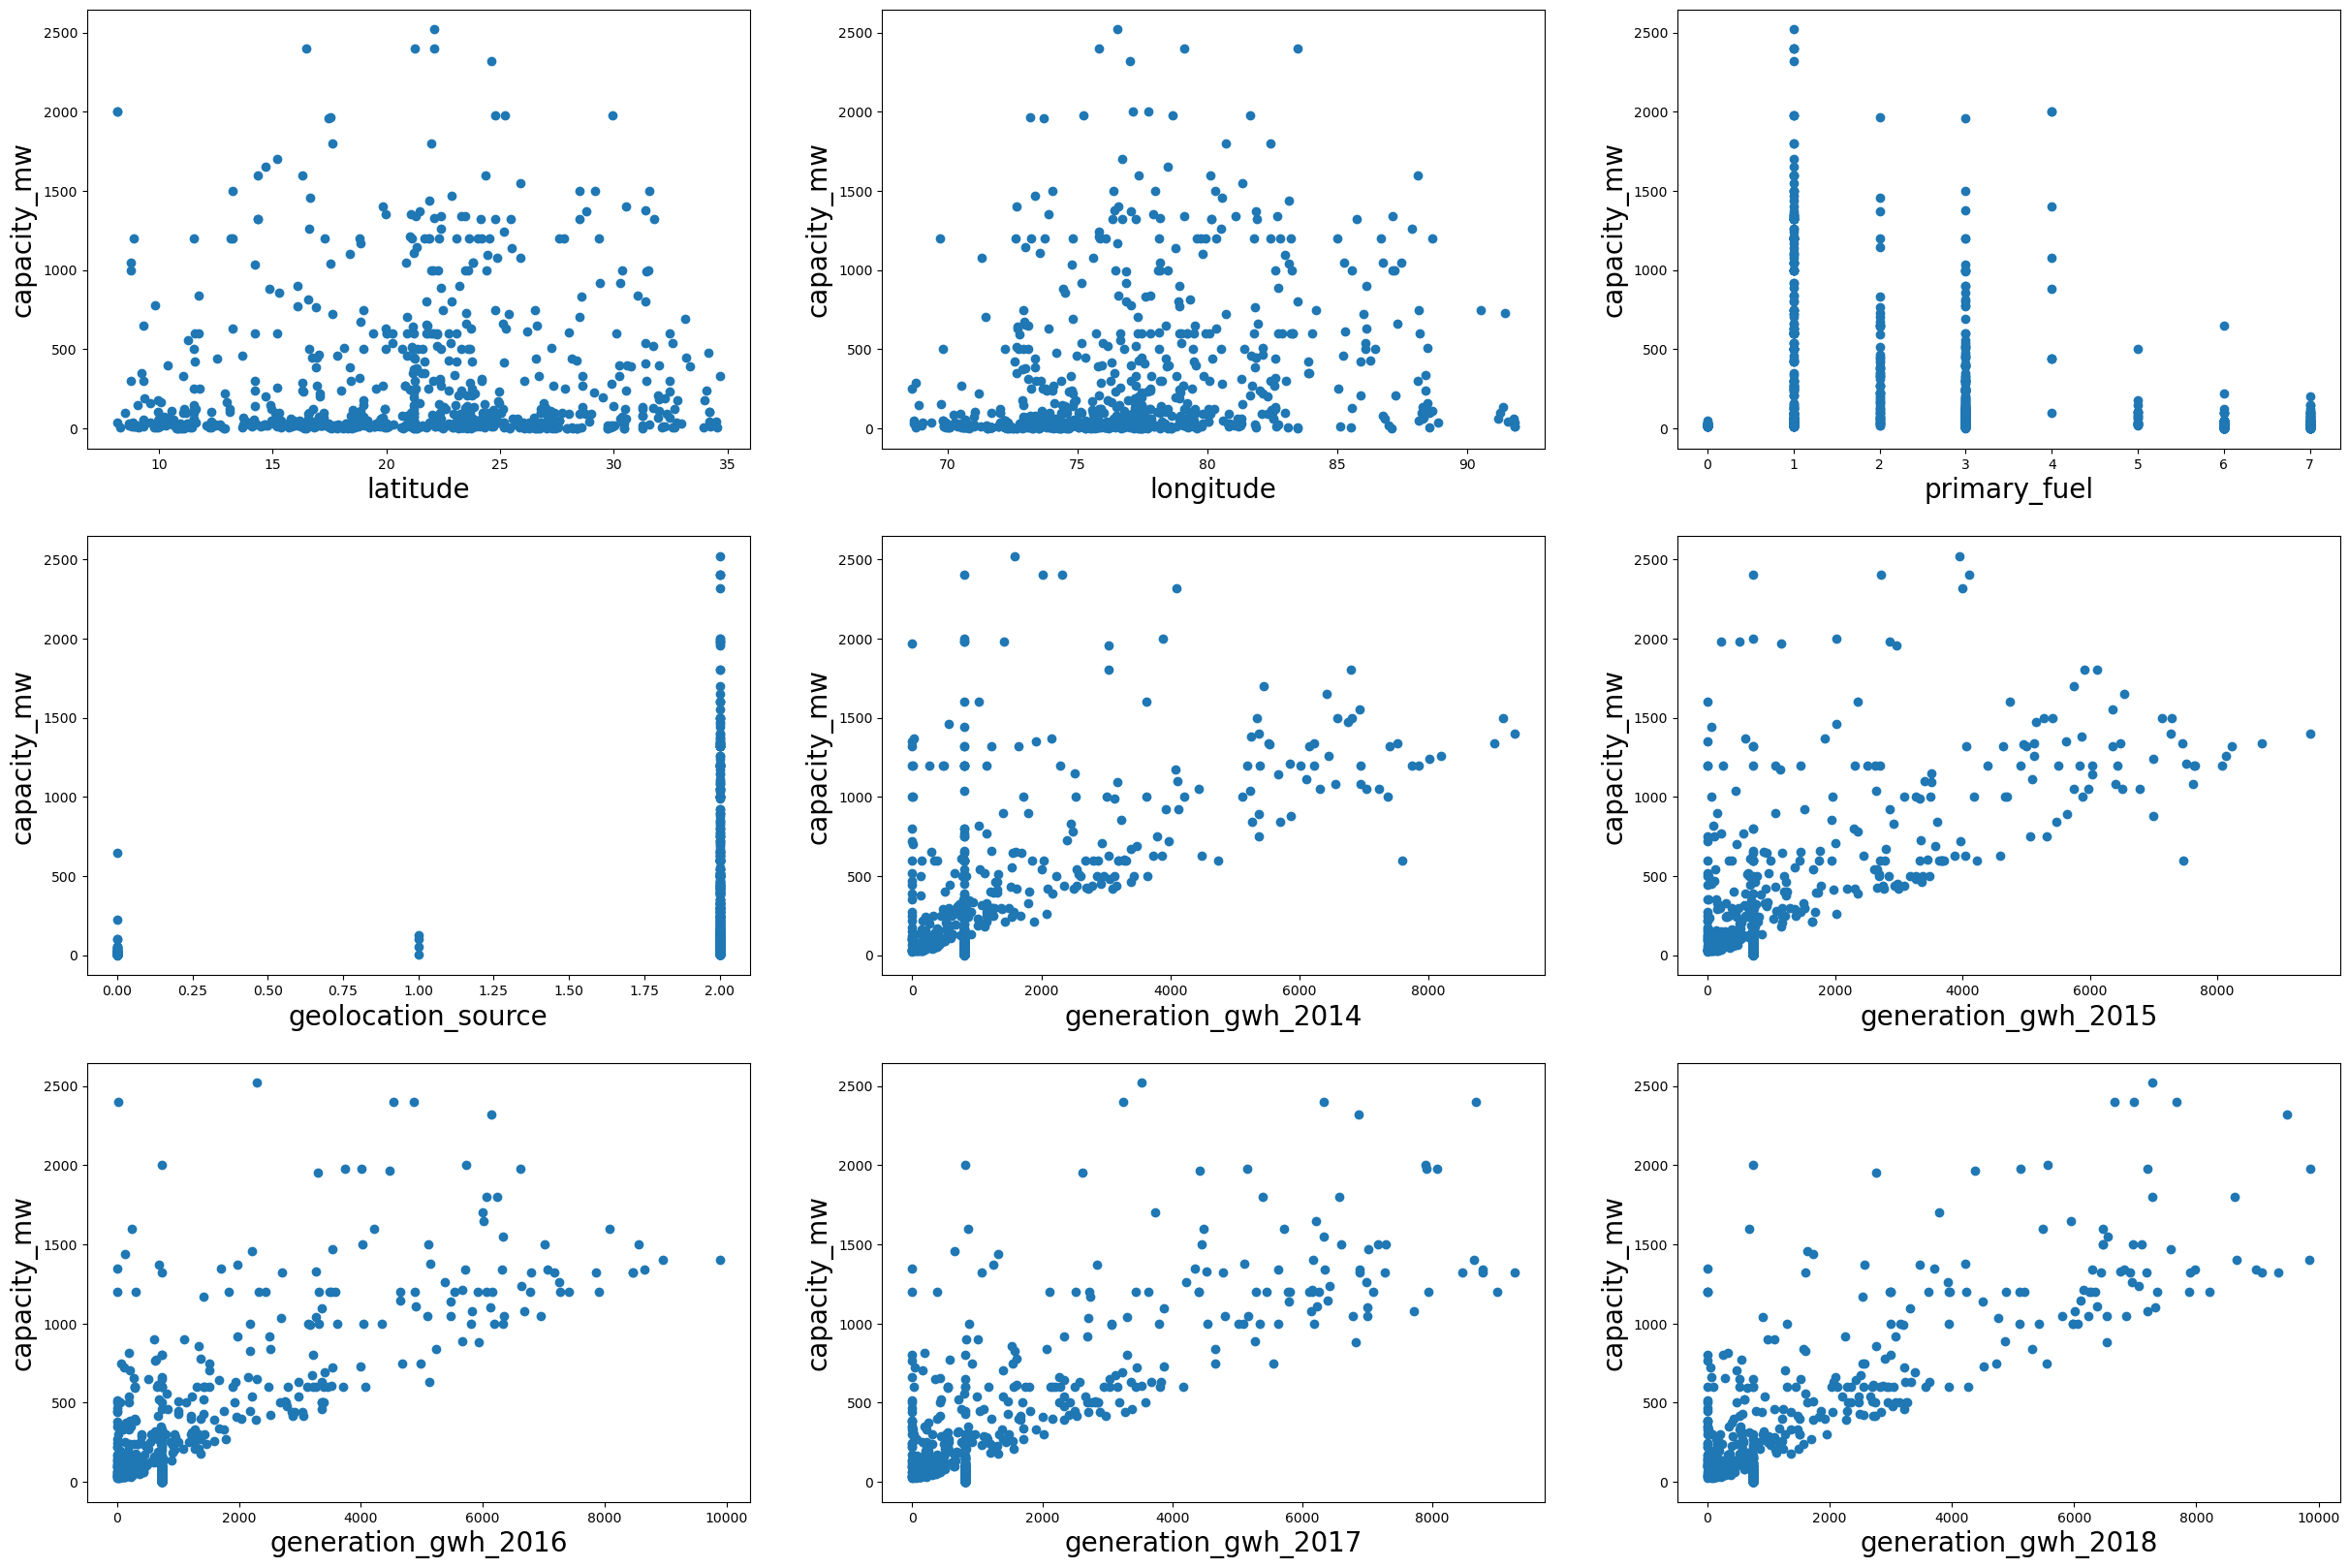

In [27]:
plt.figure(figsize=(30,20), facecolor='white')
plotnumber=1
for column in x:
    if plotnumber <= 9:
        ax=plt.subplot(3,3,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('capacity_mw',fontsize=20)
    plotnumber+=1
plt.show()

### Data Scaling using Standard Scaler

In [28]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x1 = pd.DataFrame(sc.fit_transform(x), columns=x.columns)

In [29]:
x1.head(2)

,latitude,longitude,primary_fuel,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,1.154008,-0.895439,1.191735,-1.056082,-0.269814,-0.299564,-0.303808,-0.298719,-0.317469
1,0.596533,-0.577902,-0.984368,0.401679,-0.269814,-0.299564,-0.303808,-0.298719,-0.317469


### Checking VIF(variance Inflation Factor) for multicolinearity issue

In [30]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["vif_values"]=[variance_inflation_factor(x1.values, i) for i in range(x1.shape[1])]
vif["Features"]=x1.columns
vif

,vif_values,Features
0,1.065316,latitude
1,1.196733,longitude
2,1.516592,primary_fuel
3,1.385782,geolocation_source
4,6.234364,generation_gwh_2014
5,12.867677,generation_gwh_2015
6,14.484261,generation_gwh_2016
7,19.018510,generation_gwh_2017
8,14.803327,generation_gwh_2018


Here we can see last four have high vif values(>10) means they are highly correlated with the other features.We will drop one of the column first,if the same issue exist,then we will remove the next column having high vif.

In [31]:
#Dropping generation_gwh_2017 column
x1 = x1.drop(["generation_gwh_2017"],axis=1)

In [32]:
x1.shape

(871, 8)

In [33]:
#Again checking vif value for multicilinearity issue
vif=pd.DataFrame()
vif["vif_values"]=[variance_inflation_factor(x1.values, i) for i in range(x1.shape[1])]
vif["Features"]=x1.columns
vif

,vif_values,Features
0,1.063409,latitude
1,1.196405,longitude
2,1.516592,primary_fuel
3,1.385765,geolocation_source
4,6.205224,generation_gwh_2014
5,12.653114,generation_gwh_2015
6,11.676846,generation_gwh_2016
7,6.215753,generation_gwh_2018


From the above we can see generation_gwh_2015 and generation_gwh_2016 still have higher vif values(>10).

In [34]:
#Dropping generation_gwh_2015 column
x1 = x1.drop(["generation_gwh_2015"],axis=1)

In [35]:
x1.shape

(871, 7)

In [36]:
#Again checking vif value for multicilinearity issue
vif=pd.DataFrame()
vif["vif_values"]=[variance_inflation_factor(x1.values, i) for i in range(x1.shape[1])]
vif["Features"]=x1.columns
vif

,vif_values,Features
0,1.063349,latitude
1,1.195920,longitude
2,1.515429,primary_fuel
3,1.385658,geolocation_source
4,2.843477,generation_gwh_2014
5,7.777930,generation_gwh_2016
6,6.157054,generation_gwh_2018


Now we can see the multicolinearity issue has been resolved.

### Splitting the data into Train and Test Set

In [38]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x1, y, test_size=0.2, random_state=45)

Here using the 80% data for the training set and 20% data for the testing set.

## Model Building(Regression)

In [39]:
#Importing necessary libraries for model building
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

### Linear Regression

In [40]:
model1 = LinearRegression()
model1.fit(x_train, y_train)

LinearRegression()

In [41]:
print('R2 Score(Training Accuracy) :'+ str(round(model1.score(x_train, y_train)*100))+'%')
print('R2 score(Testing Accuracy) :'+ str(round(model1.score(x_test, y_test)*100))+'%')
# Model Evaluation
y_pred=model1.predict(x_test)
print('MAE(Mean absolute Error) : %.2f' % mean_absolute_error(y_test, y_pred))
print('MSE(Mean Squared Error) : %.2f' % mean_squared_error(y_test, y_pred))
print('RMSE(Root Mean squared Error) : %.2f' % np.sqrt(mean_absolute_error(y_test, y_pred))) 

R2 Score(Training Accuracy) :70%
R2 score(Testing Accuracy) :69%
MAE(Mean absolute Error) : 139.65
MSE(Mean Squared Error) : 41289.55
RMSE(Root Mean squared Error) : 11.82


### Decision Tree Regressor

In [43]:
model2 = DecisionTreeRegressor()
model2.fit(x_train, y_train)

DecisionTreeRegressor()

In [44]:
print('R2 Score(Training Accuracy) :'+ str(round(model2.score(x_train, y_train)*100))+'%')
print('R2 score(Testing Accuracy) :'+ str(round(model2.score(x_test, y_test)*100))+'%')

# Model Evaluation
y_pred=model2.predict(x_test)
print('MAE(Mean absolute Error) : %.2f' % mean_absolute_error(y_test, y_pred))
print('MSE(Mean Squared Error) : %.2f' % mean_squared_error(y_test, y_pred))
print('RMSE(Root Mean squared Error) : %.2f' % np.sqrt(mean_absolute_error(y_test, y_pred))) 

R2 Score(Training Accuracy) :100%
R2 score(Testing Accuracy) :71%
MAE(Mean absolute Error) : 105.15
MSE(Mean Squared Error) : 39154.65
RMSE(Root Mean squared Error) : 10.25


### Random Forest Regressor

In [45]:
model3 = RandomForestRegressor()
model3.fit(x_train, y_train)

RandomForestRegressor()

In [46]:
print('R2 Score(Training Accuracy) :'+ str(round(model3.score(x_train, y_train)*100))+'%')
print('R2 score(Testing Accuracy) :'+ str(round(model3.score(x_test, y_test)*100))+'%')

# Model Evaluation
y_pred=model3.predict(x_test)
print('MAE(Mean absolute Error) : %.2f' % mean_absolute_error(y_test, y_pred))
print('MSE(Mean Squared Error) : %.2f' % mean_squared_error(y_test, y_pred))
print('RMSE(Root Mean squared Error) : %.2f' % np.sqrt(mean_absolute_error(y_test, y_pred))) 

R2 Score(Training Accuracy) :96%
R2 score(Testing Accuracy) :81%
MAE(Mean absolute Error) : 93.00
MSE(Mean Squared Error) : 25481.76
RMSE(Root Mean squared Error) : 9.64


### GradientBoostingRegressor

In [47]:
model4 = GradientBoostingRegressor()
model4.fit(x_train, y_train)

GradientBoostingRegressor()

In [48]:
print('R2 Score(Training Accuracy) :'+ str(round(model4.score(x_train, y_train)*100))+'%')
print('R2 score(Testing Accuracy) :'+ str(round(model4.score(x_test, y_test)*100))+'%')

# Model Evaluation
y_pred=model4.predict(x_test)
print('MAE(Mean absolute Error) : %.2f' % mean_absolute_error(y_test, y_pred))
print('MSE(Mean Squared Error) : %.2f' % mean_squared_error(y_test, y_pred))
print('RMSE(Root Mean squared Error) : %.2f' % np.sqrt(mean_absolute_error(y_test, y_pred))) 

R2 Score(Training Accuracy) :95%
R2 score(Testing Accuracy) :78%
MAE(Mean absolute Error) : 99.69
MSE(Mean Squared Error) : 29158.60
RMSE(Root Mean squared Error) : 9.98


### AdaBoostRegressor

In [49]:
model5 = AdaBoostRegressor()
model5.fit(x_train, y_train)

AdaBoostRegressor()

In [50]:
print('R2 Score(Training Accuracy) :'+ str(round(model5.score(x_train, y_train)*100))+'%')
print('R2 score(Testing Accuracy) :'+ str(round(model5.score(x_test, y_test)*100))+'%')

# Model Evaluation
y_pred=model5.predict(x_test)
print('MAE(Mean absolute Error) : %.2f' % mean_absolute_error(y_test, y_pred))
print('MSE(Mean Squared Error) : %.2f' % mean_squared_error(y_test, y_pred))
print('RMSE(Root Mean squared Error) : %.2f' % np.sqrt(mean_absolute_error(y_test, y_pred))) 

R2 Score(Training Accuracy) :67%
R2 score(Testing Accuracy) :44%
MAE(Mean absolute Error) : 250.91
MSE(Mean Squared Error) : 75621.68
RMSE(Root Mean squared Error) : 15.84


## Cross- Validation

In [52]:
# Checking cv score for Linear Regression
print(cross_val_score(model1,x,y,cv=5).mean())

# Checking cv score for Decision Tree Regressor
print(cross_val_score(model2,x,y,cv=5).mean())

#Checking the cv score for Random Forest Regressor
print(cross_val_score(model3,x,y,cv=5).mean())

#Checking the cv score for GradientBoostingRegressor
print(cross_val_score(model4,x,y,cv=5).mean())

#Checking the cv score for AdaBoostRegressor
print(cross_val_score(model5,x,y,cv=5).mean())

0.6613317167364481
0.5502256300024913
0.7655661548829612
0.7173643415575125
0.5558365358706416


**As in Random Forest Regressor we are getting maximum R2 score and the difference between training and testing score is minimum here and by looking in cv score choosing it as our final model.

## Hyper Parameter Tuning

In [53]:
#RandomForestRegressor
from sklearn.model_selection import GridSearchCV
parameters = {'criterion':['mse', 'mae'],
             'max_features':['auto', 'sqrt', 'log2'],
             'n_estimators':[5,10],
             'max_depth':[2,3,4]}

In [54]:
GCV = GridSearchCV(RandomForestRegressor(),parameters,cv=5)

In [55]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse', 'mae'], 'max_depth': [2, 3, 4],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [5, 10]})

In [56]:
GCV.best_params_

{'criterion': 'mae',
 'max_depth': 3,
 'max_features': 'auto',
 'n_estimators': 10}

In [59]:
Reg_model = RandomForestRegressor(criterion = 'mae',max_depth = 3,max_features = 'auto',n_estimators = 10)
Reg_model.fit(x_train, y_train)

RandomForestRegressor(criterion='mae', max_depth=3, n_estimators=10)

In [60]:
print('R2 Score(Training Accuracy) :'+ str(round(Reg_model.score(x_train, y_train)*100))+'%')
print('R2 score(Testing Accuracy) :'+ str(round(Reg_model.score(x_test, y_test)*100))+'%')

# Model Evaluation
y_pred=Reg_model.predict(x_test)
print('MAE(Mean absolute Error) : %.2f' % mean_absolute_error(y_test, y_pred))
print('MSE(Mean Squared Error) : %.2f' % mean_squared_error(y_test, y_pred))
print('RMSE(Root Mean squared Error) : %.2f' % np.sqrt(mean_absolute_error(y_test, y_pred))) 

R2 Score(Training Accuracy) :79%
R2 score(Testing Accuracy) :81%
MAE(Mean absolute Error) : 85.75
MSE(Mean Squared Error) : 26030.57
RMSE(Root Mean squared Error) : 9.26


Now the difference between training and testing accuracy has been reduced and the error also reduced after tuning.

### Saving the model

In [62]:
import joblib
joblib.dump(Reg_model,"Global_PowerPlant_capacity_analysis.pkl")

['Global_PowerPlant_capacity_analysis.pkl']

## 2. Primary Fuel (Prediction)

### Separating the features and target

In [63]:
x_new = df_pp.drop(['primary_fuel'],axis=1)  #Features
y_new = df_pp['primary_fuel']   #Target

### Visualizing the relationship of features with the label/target.

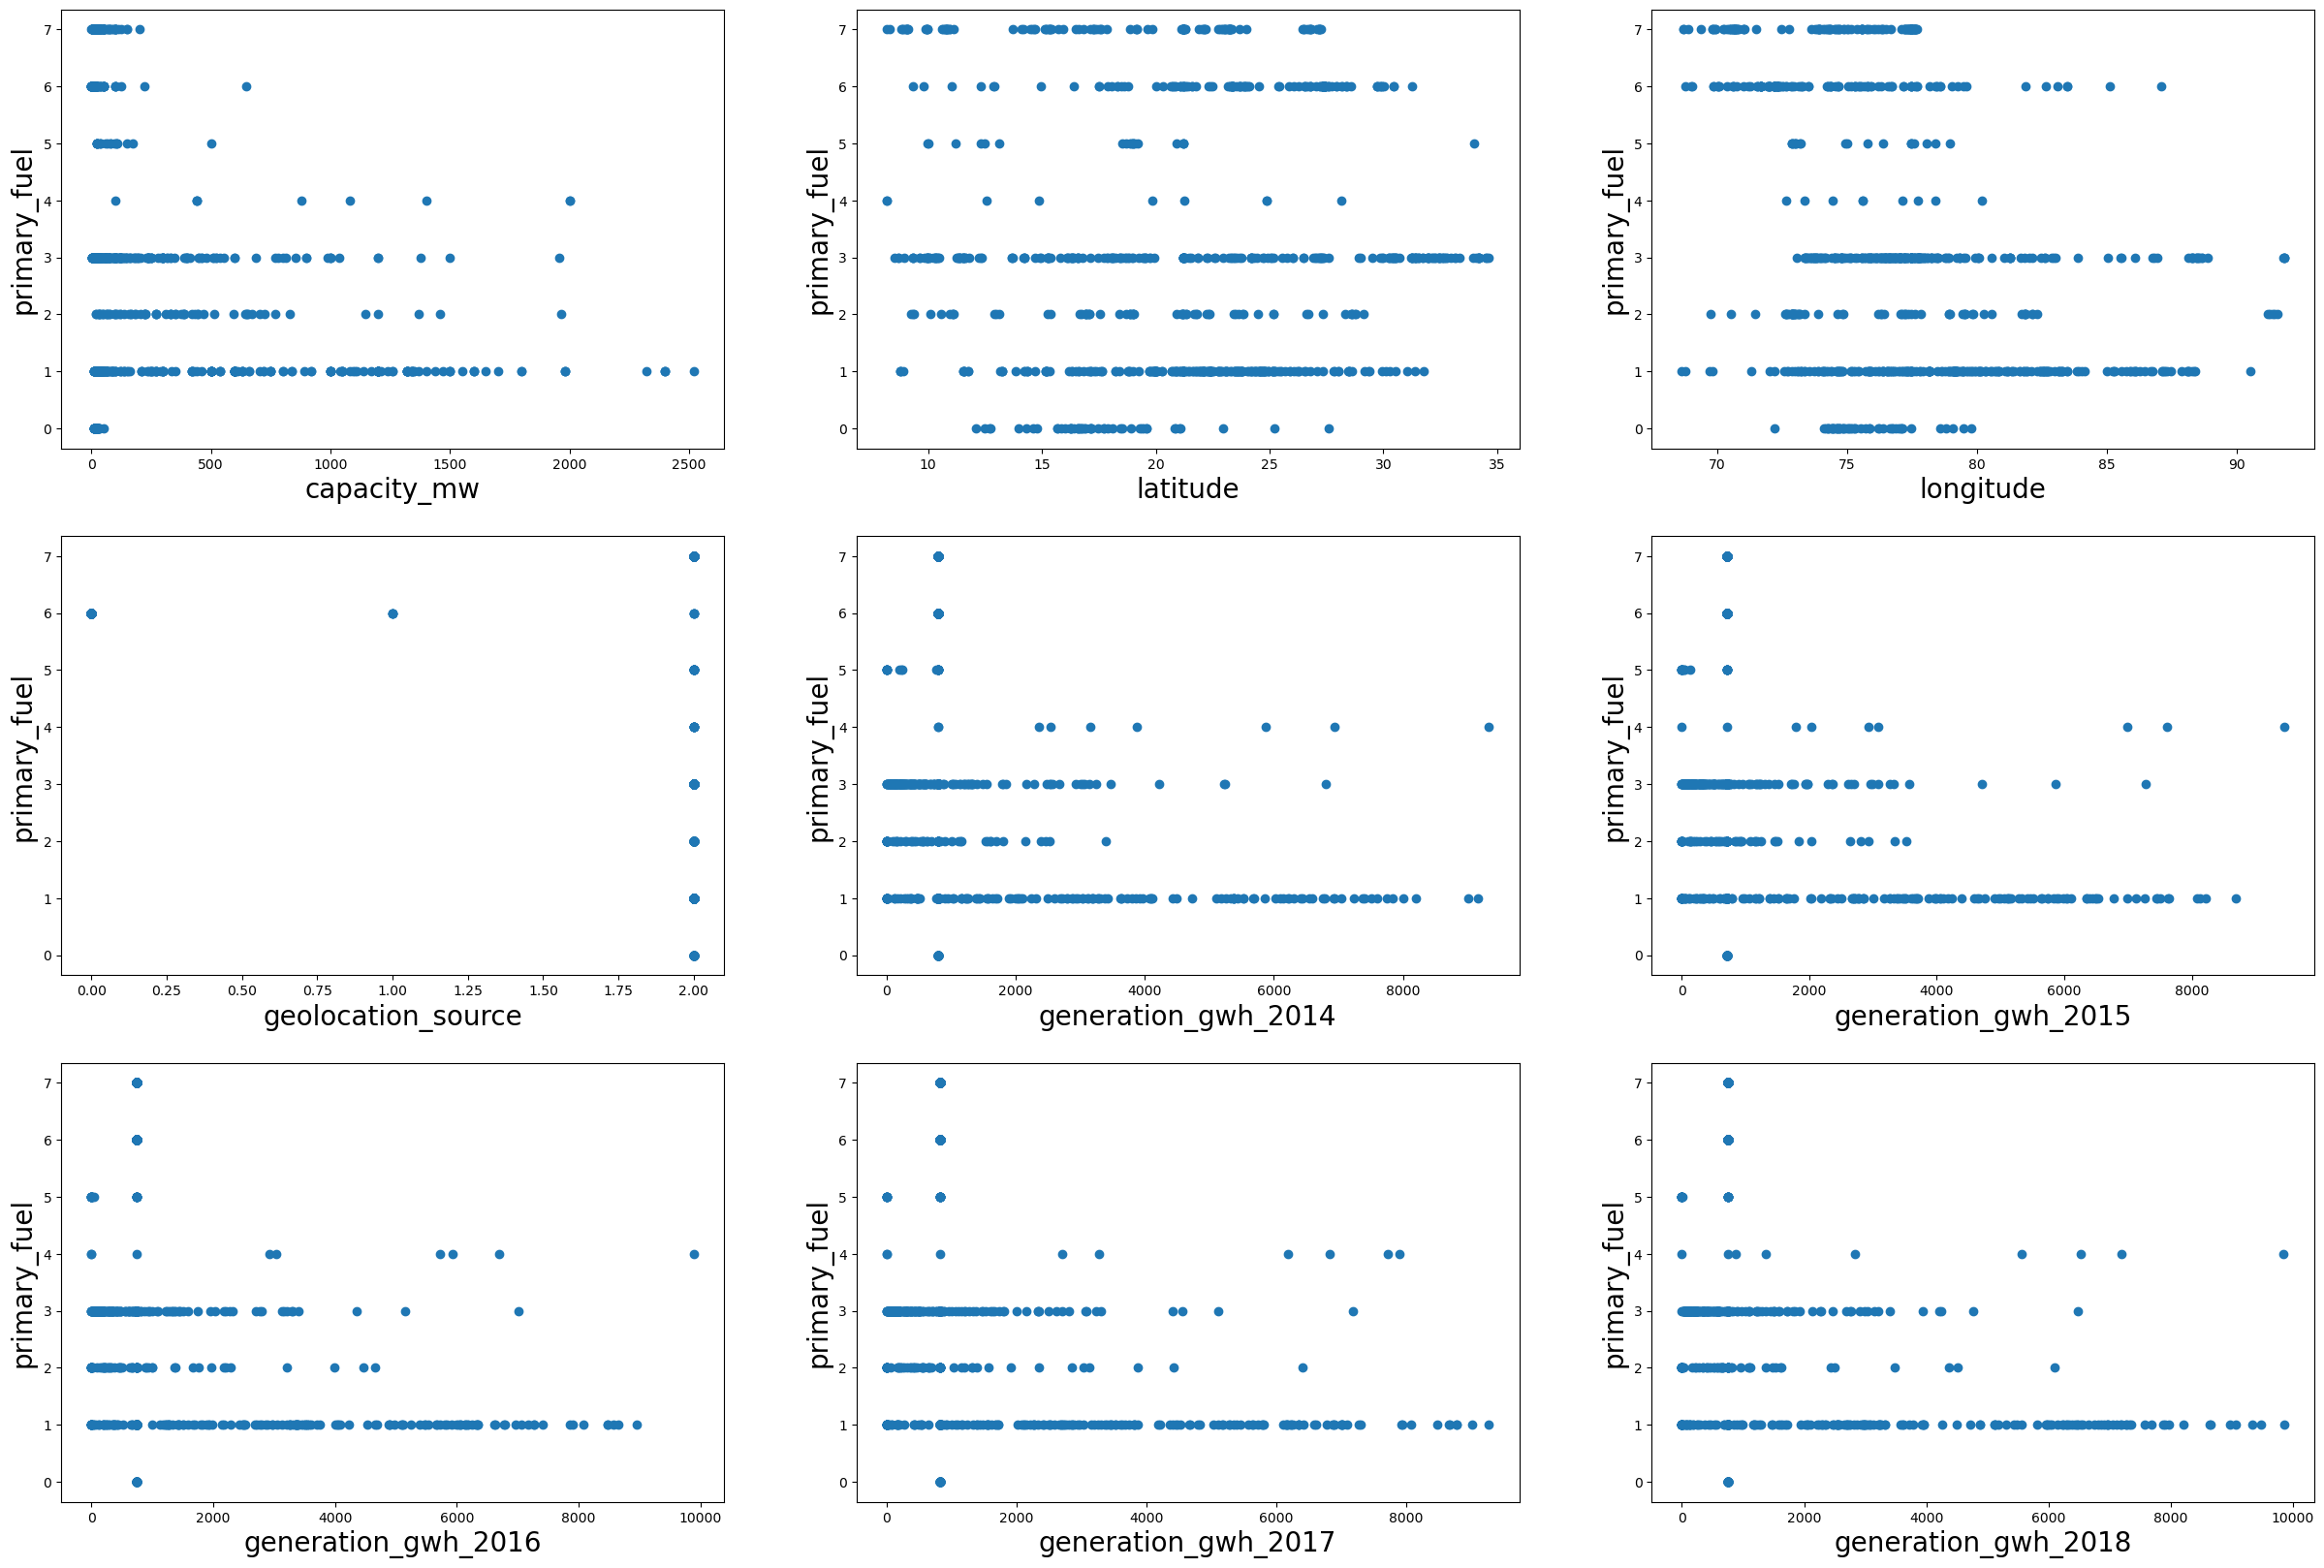

In [68]:
plt.figure(figsize=(30,20), facecolor='white')
plotnumber=1
for column in x_new:
    if plotnumber <= 9:
        ax=plt.subplot(3,3,plotnumber)
        plt.scatter(x_new[column],y_new)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('primary_fuel',fontsize=20)
    plotnumber+=1
plt.show()

### Data Scaling using Standard Scaler

In [69]:
sc = StandardScaler()
x1_new = pd.DataFrame(sc.fit_transform(x_new), columns=x_new.columns)

In [70]:
x1_new.head(2)

,capacity_mw,latitude,longitude,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,-0.607572,1.154008,-0.895439,-1.056082,-0.269814,-0.299564,-0.303808,-0.298719,-0.317469
1,-0.393018,0.596533,-0.577902,0.401679,-0.269814,-0.299564,-0.303808,-0.298719,-0.317469


### Checking VIF(variance Inflation Factor) for multicolinearity issue

In [71]:
vif=pd.DataFrame()
vif["vif_values"]=[variance_inflation_factor(x1_new.values, i) for i in range(x1_new.shape[1])]
vif["Features"]=x1_new.columns
vif

,vif_values,Features
0,3.184438,capacity_mw
1,1.059136,latitude
2,1.128463,longitude
3,1.179337,geolocation_source
4,6.242847,generation_gwh_2014
5,12.859172,generation_gwh_2015
6,14.482975,generation_gwh_2016
7,19.022181,generation_gwh_2017
8,16.509307,generation_gwh_2018


From above we can see last four have higher vif values(>10) means they are highly correlated with the other features.We will drop one of the column which have higher value first,if the same issue exist,then we will remove the next column having high vif.

In [72]:
#Dropping generation_gwh_2017 column
x1_new = x1_new.drop(["generation_gwh_2017"],axis=1)

In [73]:
x1_new.shape

(871, 8)

In [74]:
#Again checking vif value for multicilinearity issue
vif=pd.DataFrame()
vif["vif_values"]=[variance_inflation_factor(x1_new.values, i) for i in range(x1_new.shape[1])]
vif["Features"]=x1_new.columns
vif

,vif_values,Features
0,3.183824,capacity_mw
1,1.057272,latitude
2,1.128077,longitude
3,1.179288,geolocation_source
4,6.214160,generation_gwh_2014
5,12.645101,generation_gwh_2015
6,11.675479,generation_gwh_2016
7,8.030331,generation_gwh_2018


From the above we can see generation_gwh_2015 and generation_gwh_2016 still have higher vif values(>10).

In [75]:
#Dropping generation_gwh_2015 column
x1_new = x1_new.drop(["generation_gwh_2015"],axis=1)

In [76]:
x1_new.shape

(871, 7)

In [77]:
#Again checking vif value for multicilinearity issue
vif=pd.DataFrame()
vif["vif_values"]=[variance_inflation_factor(x1_new.values, i) for i in range(x1_new.shape[1])]
vif["Features"]=x1_new.columns
vif

,vif_values,Features
0,3.183398,capacity_mw
1,1.057161,latitude
2,1.127911,longitude
3,1.178585,geolocation_source
4,2.843944,generation_gwh_2014
5,7.777829,generation_gwh_2016
6,7.981183,generation_gwh_2018


Now we can see the multicolinearity issue has been resolved.

In [78]:
#checking of class imbalance of target variable
y_new.value_counts()

3    240
1    238
6    126
7    123
2     65
0     50
5     20
4      9
Name: primary_fuel, dtype: int64

Here we can see that the targer primary_fuel has multiple classes, hence we can see that this is a multi classification problem. As the data between the classes are not balance as all have diiferent counts, so we have to do oversampling of the data.

### Oversampling data using SMOTE

In [79]:
# Oversampling the data as our target dataset is imbalance as we have checked before.
from imblearn.over_sampling import SMOTE
os=SMOTE()
x1_new,y1_new = os.fit_resample(x1_new,y_new)

In [80]:
#Now checking value count of target column
y1_new.value_counts()

6    240
1    240
7    240
2    240
3    240
0    240
5    240
4    240
Name: primary_fuel, dtype: int64

Now the data is balanced.So there is no class imbalance.

### Splitting the dataset in Train and Test Set

In [81]:
x_train, x_test, y_train, y_test = train_test_split(x1_new,y1_new, test_size=0.25, random_state=0)

Here using the 75% data for the training set and 25% data for the testing set.

## Model Building(Classification)

In [82]:
#Importing necessary libraries for model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, accuracy_score
from sklearn.ensemble import BaggingClassifier, GradientBoostingClassifier, RandomForestClassifier

### Decision Tree Classifier

In [83]:
Model1 = DecisionTreeClassifier(random_state=0, criterion='entropy', max_depth=None)
Model1.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [85]:
pred = Model1.predict(x_test)
acc = accuracy_score(y_test,pred)
print('Model Accuracy : '+ str(round(acc*100))+'%')
print('Classification Report :\n',classification_report(y_test,pred))

# Cross Validation Score
cv_score = (cross_val_score(Model1, x_new, y_new, cv=5).mean())
print("Cross Validation Score:", cv_score)
    
# Result of accuracy minus cv scores
result = acc - cv_score
print("Difference between Accuracy Score and Cross Validation Score is", result)

Model Accuracy : 82%
Classification Report :
               precision    recall  f1-score   support

           0       0.88      0.91      0.90        58
           1       0.62      0.58      0.60        67
           2       0.82      0.82      0.82        50
           3       0.64      0.60      0.62        63
           4       0.87      0.92      0.89        72
           5       0.84      0.92      0.88        53
           6       1.00      1.00      1.00        56
           7       0.88      0.84      0.86        61

    accuracy                           0.82       480
   macro avg       0.82      0.82      0.82       480
weighted avg       0.82      0.82      0.82       480

Cross Validation Score: 0.7175369458128078
Difference between Accuracy Score and Cross Validation Score is 0.10121305418719218


### Logistic Regression

In [86]:
Model2 = LogisticRegression()
Model2.fit(x_train, y_train) 

LogisticRegression()

In [87]:
pred = Model2.predict(x_test)
acc = accuracy_score(y_test,pred)
print('Model Accuracy : '+ str(round(acc*100))+'%')
print('Classification Report :\n',classification_report(y_test,pred))

# Cross Validation Score
cv_score = (cross_val_score(Model2, x_new, y_new, cv=5).mean())
print("Cross Validation Score:", cv_score)
    
# Result of accuracy minus cv scores
result = acc - cv_score
print("Difference between Accuracy Score and Cross Validation Score is", result)

Model Accuracy : 56%
Classification Report :
               precision    recall  f1-score   support

           0       0.43      0.66      0.52        58
           1       0.52      0.34      0.41        67
           2       0.59      0.54      0.56        50
           3       0.41      0.29      0.34        63
           4       0.75      0.71      0.73        72
           5       0.55      0.53      0.54        53
           6       1.00      1.00      1.00        56
           7       0.31      0.43      0.36        61

    accuracy                           0.56       480
   macro avg       0.57      0.56      0.56       480
weighted avg       0.57      0.56      0.55       480

Cross Validation Score: 0.4397110016420361
Difference between Accuracy Score and Cross Validation Score is 0.11653899835796394


### Random Forest Classifier

In [88]:
Model3 = RandomForestClassifier()
Model3.fit(x_train, y_train)

RandomForestClassifier()

In [89]:
pred = Model3.predict(x_test)
acc = accuracy_score(y_test,pred)
print('Model Accuracy : '+ str(round(acc*100))+'%')
print('Classification Report :\n',classification_report(y_test,pred))

# Cross Validation Score
cv_score = (cross_val_score(Model3, x_new, y_new, cv=5).mean())
print("Cross Validation Score:", cv_score)
    
# Result of accuracy minus cv scores
result = acc - cv_score
print("Difference between Accuracy Score and Cross Validation Score is", result)

Model Accuracy : 88%
Classification Report :
               precision    recall  f1-score   support

           0       0.88      0.98      0.93        58
           1       0.86      0.66      0.75        67
           2       0.79      0.92      0.85        50
           3       0.76      0.76      0.76        63
           4       0.91      0.99      0.95        72
           5       0.94      0.92      0.93        53
           6       1.00      1.00      1.00        56
           7       0.91      0.85      0.88        61

    accuracy                           0.88       480
   macro avg       0.88      0.89      0.88       480
weighted avg       0.88      0.88      0.88       480

Cross Validation Score: 0.7692413793103448
Difference between Accuracy Score and Cross Validation Score is 0.11200862068965523


### XGBoost Classifier

In [90]:
Model4 = XGBClassifier()
Model4.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [91]:
pred = Model4.predict(x_test)
acc = accuracy_score(y_test,pred)
print('Model Accuracy : '+ str(round(acc*100))+'%')
print('Classification Report :\n',classification_report(y_test,pred))

# Cross Validation Score
cv_score = (cross_val_score(Model4, x_new, y_new, cv=5).mean())
print("Cross Validation Score:", cv_score)
    
# Result of accuracy minus cv scores
result = acc - cv_score
print("Difference between Accuracy Score and Cross Validation Score is", result)

Model Accuracy : 89%
Classification Report :
               precision    recall  f1-score   support

           0       0.85      0.91      0.88        58
           1       0.76      0.72      0.74        67
           2       0.92      0.92      0.92        50
           3       0.80      0.78      0.79        63
           4       0.93      0.96      0.95        72
           5       0.95      0.98      0.96        53
           6       1.00      1.00      1.00        56
           7       0.90      0.87      0.88        61

    accuracy                           0.89       480
   macro avg       0.89      0.89      0.89       480
weighted avg       0.89      0.89      0.89       480

Cross Validation Score: 0.7612019704433497
Difference between Accuracy Score and Cross Validation Score is 0.12629802955665026


Taking Random Forest Classifier as our final model as the accuracy is 88% and the Difference between Accuracy Score and Cross Validation Score is also minimum.

### Hyper Parameter Tuning

In [92]:
#Random Forest Classifier
from sklearn.model_selection import GridSearchCV 

parameters = {'criterion':['entropy','gini'],
             'n_estimators':[20,30],
             'max_depth':[10,15],
             'min_samples_split':[10,11],
             'min_samples_leaf':[5,6]
             }

In [93]:
gcv=GridSearchCV(RandomForestClassifier(),parameters,cv=5)

In [94]:
gcv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [10, 15], 'min_samples_leaf': [5, 6],
                         'min_samples_split': [10, 11],
                         'n_estimators': [20, 30]})

In [95]:
gcv.best_params_

{'criterion': 'entropy',
 'max_depth': 15,
 'min_samples_leaf': 5,
 'min_samples_split': 10,
 'n_estimators': 30}

In [96]:
Class_model=RandomForestClassifier(criterion = 'entropy',max_depth = 15,min_samples_leaf = 5,min_samples_split = 10,n_estimators = 30)
Class_model.fit(x_train,y_train)
pred=Class_model.predict(x_test)
acc = accuracy_score(y_test,pred)
print('Model Accuracy : '+ str(round(acc*100))+'%')

Model Accuracy : 82%


In [97]:
# Cross Validation Score
cv_score = (cross_val_score(Class_model, x_new, y_new, cv=5).mean())
print("Cross Validation Score:", cv_score)
    
# Result of accuracy minus cv scores
result = acc - cv_score
print("Difference between Accuracy Score and Cross Validation Score is", result)

Cross Validation Score: 0.7370771756978653
Difference between Accuracy Score and Cross Validation Score is 0.08167282430213463


Now we can see the difference between Accuracy Score and Cross Validation Score is reduced to a great extent.

#### Saving the model

In [99]:
joblib.dump(Class_model,"Global_PowerPlant_FuelType_analysis.pkl")

['Global_PowerPlant_FuelType_analysis.pkl']

Finally saved the best classification model for Global PowerPlant Fuel Type analysis Project analysis.